<img src="Datos/ecs.png" />

# Datos atípicos

## Visualización de datos faltantes

In [1]:
# IMPORTAR LIBRERÍAS
import numpy as np
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/dataoptimal/posts/master/data%20cleaning%20with%20R%20and%20the%20tidyverse/telecom.csv"
data = pd.read_csv(url, sep=",")
print(data.shape)
data.info()

(10, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      10 non-null     object
 1   MonthlyCharges  8 non-null      object
 2   TotalCharges    8 non-null      object
 3   PaymentMethod   9 non-null      object
 4   Churn           10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


Se procede a cambiar el nombre de las columnas y visualizar la estructura de la data

In [3]:
columnas = ['ID cliente', 'Cargo Mensual', 'Cargo Total', 'Método de Pago', 'Cancelación']
data.columns = columnas 
data.head(10)

,ID cliente,Cargo Mensual,Cargo Total,Método de Pago,Cancelación
0,7590-VHVEG,29.85,109.9,Electronic check,yes
1,5575-GNVDE,56.95,na,Mailed check,yes
2,3668-QPYBK,NaN,108.15,--,yes
3,7795-CFOCW,42.3,1840.75,Bank transfer,no
4,9237-HQITU,70.7,NaN,Electronic check,no
5,9305-CDSKC,Nan,820.5,--,yes
6,1452-KIOVK,89.1,1949.4,Credit card,no
7,6713-OKOMC,NaN,NaN,NaN,yes
8,7892-POOKP,104.8,3046.05,Electronic check,no
9,8451-AJOMK,54.1,354.95,Electronic check,no


Se observa presencia de valores nulos en distintos formatos. Para verificar como están indicado los valores nulos, se procede a capturar valores unicos por columna a fin de hacer menos compleja su busqueda.

In [4]:
for columna in columnas:
    i = data[columna].unique()
    print(i)
    

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '8451-AJOMK']
['29.85' '56.95' nan '42.3' '70.7' 'Nan' '89.1' '104.8' '54.1']
['109.9' 'na' '108.15' '1840.75' nan '820.5' '1949.4' '3046.05' '354.95']
['Electronic check' 'Mailed check' '--' 'Bank transfer' 'Credit card' nan]
['yes' 'no']


Por medio de esta función hemos identificado las diferentes maneras de ingreso de los valores nulos al Dataframe.
A continuación, procederemos a leer nuevamente el archivo csv agregando el parámetro __na_values__ donde indicaremos el formato de los valores nulos.

In [5]:
# volver a importar la data identificando los nulos
data = pd.read_csv(url, sep=",", na_values= ["nan","Nan", "na","--"])
data.columns = columnas
data.head(10)

,ID cliente,Cargo Mensual,Cargo Total,Método de Pago,Cancelación
0,7590-VHVEG,29.85,109.90,Electronic check,yes
1,5575-GNVDE,56.95,NaN,Mailed check,yes
2,3668-QPYBK,NaN,108.15,NaN,yes
3,7795-CFOCW,42.30,1840.75,Bank transfer,no
4,9237-HQITU,70.70,NaN,Electronic check,no
5,9305-CDSKC,NaN,820.50,NaN,yes
6,1452-KIOVK,89.10,1949.40,Credit card,no
7,6713-OKOMC,NaN,NaN,NaN,yes
8,7892-POOKP,104.80,3046.05,Electronic check,no
9,8451-AJOMK,54.10,354.95,Electronic check,no


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID cliente      10 non-null     object 
 1   Cargo Mensual   7 non-null      float64
 2   Cargo Total     7 non-null      float64
 3   Método de Pago  7 non-null      object 
 4   Cancelación     10 non-null     object 
dtypes: float64(2), object(3)
memory usage: 528.0+ bytes


In [7]:
data.describe()

,Cargo Mensual,Cargo Total
count,7.000000,7.000000
mean,63.971429,1175.671429
std,26.218185,1126.536177
min,29.850000,108.150000
25%,48.200000,232.425000
50%,56.950000,820.500000
75%,79.900000,1895.075000
max,104.800000,3046.050000


<AxesSubplot:title={'center':'Cantidad datos completos'}>

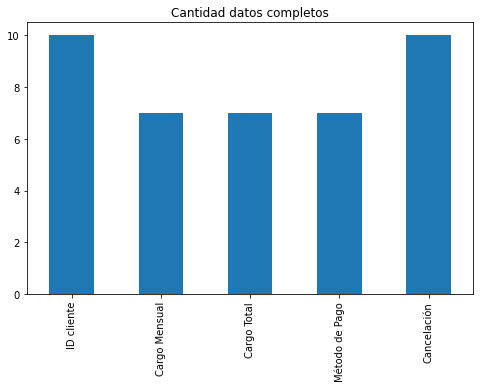

In [8]:
data.notna().sum().plot(kind='bar', title = 'Cantidad datos completos',figsize= (8,5))

In [9]:
# Cantidad de datos perdidos
data.isnull().sum()

ID cliente        0
Cargo Mensual     3
Cargo Total       3
Método de Pago    3
Cancelación       0
dtype: int64

In [10]:
# Porcentaje de datos perdidos
data.isnull().mean()*100

ID cliente         0.0
Cargo Mensual     30.0
Cargo Total       30.0
Método de Pago    30.0
Cancelación        0.0
dtype: float64

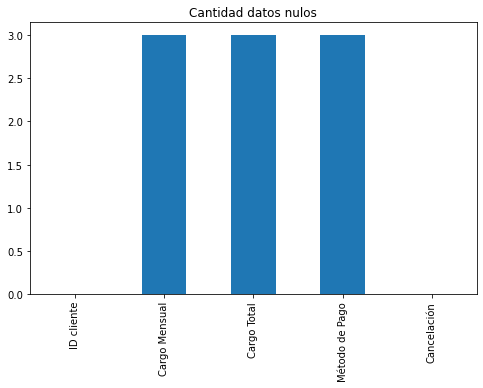

In [11]:
import matplotlib.pyplot as plt 

data.isnull().sum().plot(kind='bar' , title = 'Cantidad datos nulos',figsize= (8,5))
plt.show()

## Librería missingno

In [12]:
#%pip install missingno
import missingno as msno

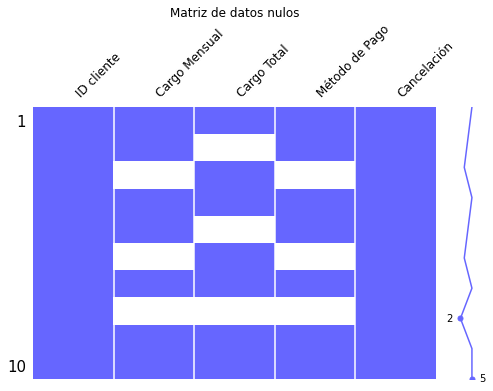

In [13]:
# Visualizar valore faltantes por medio de una matriz
msno.matrix(data, color=(0.4,0.4,1),fontsize= 12, figsize= (8,5))
plt.title('Matriz de datos nulos')
plt.show()

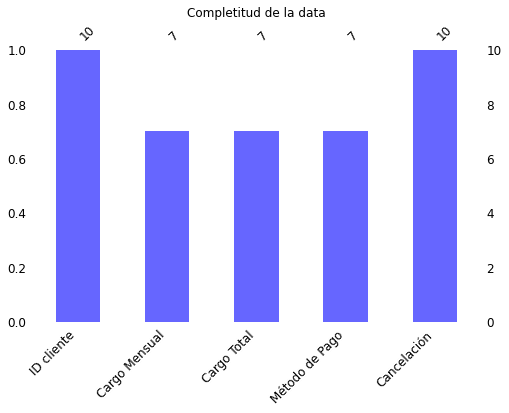

In [14]:
# Visualizar valore faltantes a través de un gráfico de barras
msno.bar(data, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.title('Completitud de la data')
plt.show()

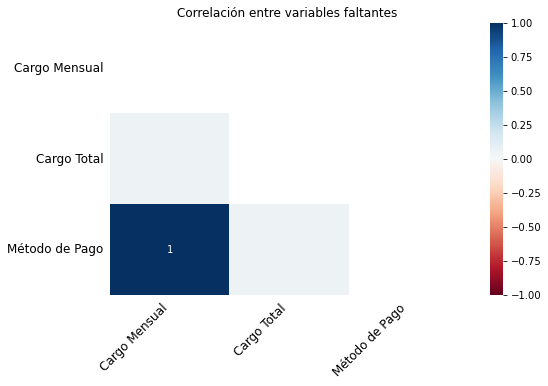

In [15]:
# Visualización de la correlación entre el número de valores faltantes in diferentes columnas por medio de un 
# mapa de calor
msno.heatmap(data, fontsize=12,figsize= (8,5))
plt.title('Correlación entre variables faltantes ')
plt.show()

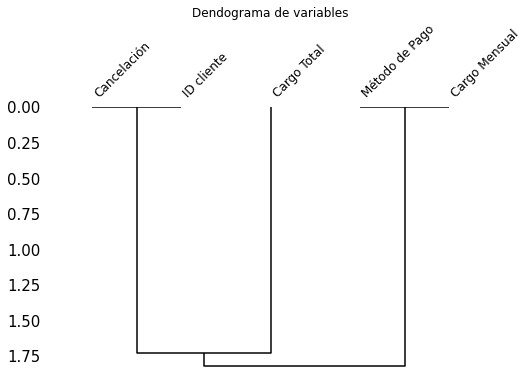

In [16]:
msno.dendrogram(data, fontsize=12,figsize= (8,5))
plt.title('Dendograma de variables')
plt.show()

## Tipo de Dato Faltante

A continuación trabajaremos con el data ser _diabetes.csv_ el cual importaremos desde github.

Las variables de este dataset son:

- Pregnancies: número de veces que ha estado embarazada la persona de estudio.

- Glucose: Señala la cantidad de glucosa en la sangre. Cuando una persona ha ingerido alimento los valores normales son menores a 140 mg/DL y cuando los resultados se dan entre 140 a 190 son indicativos de diabetes.

- BloodPressure: La cantidad de presión que hay en tus arterias ente un latido y otro.

- SkinThickness: Es un procedimiento frecuentemente utilizado, en combinación con el índice de masa corporal (IMC), para estimar la grasa corporal. Medir los pliegues cutáneos permite valorar los depósitos de grasa del cuerpo humano.Según la medicina el espesor normal: ♂ 12 mm; ♀ 23 mm

- Insulin: Es una prueba de insulina que consiste analizar antes de administrar la glucosa y 2 horas después. La razón por la que se realizan estas pruebas es para ver su curva de respuesta a la glucosa.

- BMI: Es un método utilizado para estimar la cantidad de grasa corporal que tiene una persona, y determinar por tanto si el peso está dentro del rango normal, o por el contrario, se tiene sobrepeso o delgadez.

- DiabetesPedigreeFunction: Una función que califica la probabilidad de diabetes según los antecedentes familiares.

- Age: en años.

- Outcome: si es positivo o negativo al diagnóstico de diabetes.

In [17]:
url = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv"
diabetes = pd.read_csv(url, sep=",")
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Se realiza revisión de la data para determinar si existen valores nulos 

In [18]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Se observa que no existen valores nulos en la data. Al explorar los datos visualizados por medio de la función __.head()__  podemos apreciar que gran parte de las columnas presentan valores ceros. Este valor, en algunos casos, corresponde a dato faltante, tales como nivel de glucosa (__Glucose__), presión arterial (__BloodPressure__), grosor de piel (__SkinThickness__), nivel de insulina (__Insulin__) e indice de masa corporal (__BMI__)	
En cambio las variables embarazo (__Pregnancies__), función de medición de diabetes (__DiabetesPedigreeFunction__), edad (__Age__) y resultado (__Outcome__) si pueden contener valores faltantes.

Estas variables las reemplazaremos por NaN. Para esto seleccionaremos las columnas por medio de una lista.

In [19]:
columnas_cambiar = list(diabetes.columns[1:6])

Ahora procedemos a realizar el cambio de valores a _nan_ por medio de un loop for. 

In [20]:
for i in columnas_cambiar:
    diabetes[i][diabetes[i] == 0] = np.nan
        

/var/folders/wv/t4d2lfln5z7gpyfngt156l9m0000gn/T/ipykernel_25760/2391080340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes[i][diabetes[i] == 0] = np.nan


In [21]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


A continuación se realizarán visualizaciones apoyados de la librería missingno a fin de poder determinar el tipo de dato faltante

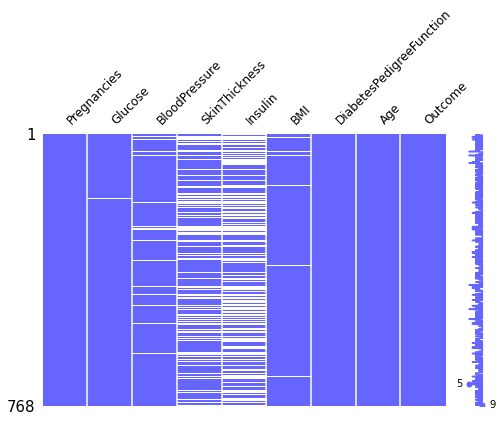

In [22]:
import matplotlib.pyplot as plt
import missingno as msno

# Graficar los valores perdidos.
msno.matrix(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.show()

De esta visualización podemos realizar algunas conjeturas:

- Glucose: contiene datos perdidos completamente al azar
- BMI: contiene datos perdidos completamente al azar
- Insulin: contine datos perdidos no debido al azar
- SkinThickness: contine datos perdidos no debido al azar
- BloodPresure: contiene datos perdidos al azar

Estas conclusiones se pueden inferir debido a la cantidad de valores nulos. Sin embargo, para poder confirmar lo concluido continuaremos realizando visualizaciones de datos.

__Datos Perdidos no al azar (MNAR)__:

Para determinar si existen valores perdidos no al azar seleccionaremos la variable con mayor cantidad de datos ausentes y observaremos si existen otras variables que se correlacionen con esta. Eligiremos la variable _Insuline_.

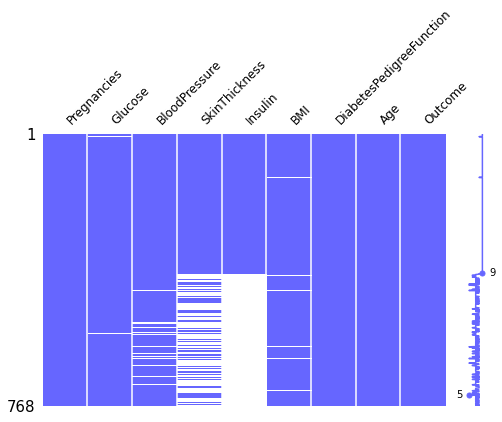

In [23]:
# Datos Perdidos no al azar (MNAR).
# Ordenar DataFrame por la variables
diabetes_sort = diabetes.sort_values('Insulin')

# Graficar los datos perdidos de forma ordenada.
msno.matrix(diabetes_sort, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.show()

Podemos obervar que la variable _Insuline_ está correlada con la variable _SkinThickness_ ya que ambas muestran correlación con sus datos no nulos y datos ausentes.

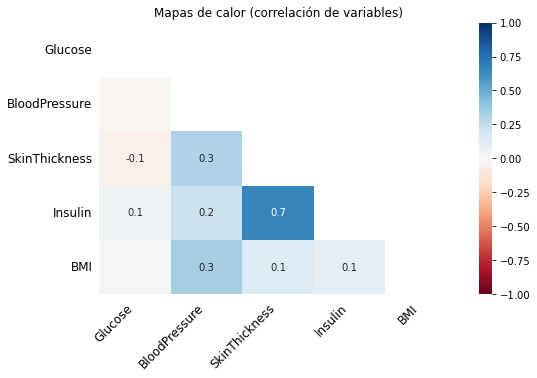

In [24]:
# Mapas de calor
msno.heatmap(diabetes,fontsize= 12,figsize= (8,5))
plt.title('Mapas de calor (correlación de variables)')
plt.show()

Los valores oscilan entre -1 y 1, donde:
- Correlación positiva = Valores cercanos a 1
- Correlación negativa = Valores cercanos a -1
- Ausencia de Correlación= Valores cercanos a 0

Esta visualización confirma la conclusión obtenida en el gráfico anterior, donde la variable Insuline está altamente correlada de manera positiva (0.7) con la variable SkinThickness.

Otro método para conocer el tipo de dato ausente es el __dendograma__. Este gráfico muestra la correlación de variables agrupandolas. A continuación se realizará una visualización de dendograma.

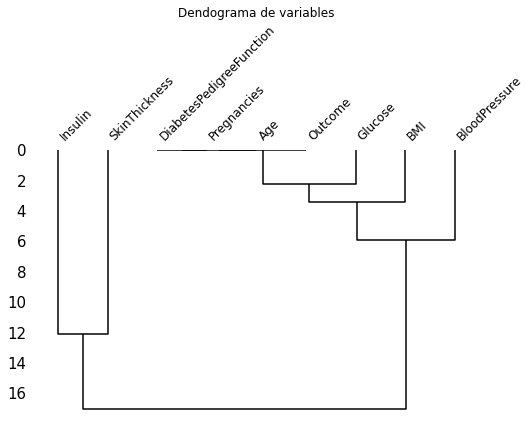

In [25]:
msno.dendrogram(diabetes, fontsize=12,figsize= (8,5))
plt.title('Dendograma de variables')
plt.show()

Podemos observar la existencia de algunos cluster por similitud de dato ausente:
- Cluster sin dato ausente: diabetesPedrigreeFunction, Pregnancies, Age, Outcome
- Cluster alta correlación de datos faltantes: Insuline, SkinThinckness. Se puede reafirmar que los datos de estas variables presenta datos perdidos no al azar.
- Cluster baja correlación de datos faltantes: Glucose, BMI, BloodPresure. De estas variables se podría concluir que Glucose contiene datos perdidos completamente al azar 

__Eliminación Datos Faltante__

- Eliminación por parejas:

Se realiza un ejemplo calculando la media.

In [26]:
#Eliminación por parejas

#Cálculo media por medio de una función
print('fn_media = ' + str(diabetes['Glucose'].mean()))

print('cantidad de filas DataFrame = ' + str(len(diabetes)))
print()
print('cantidad de filas variable Glucose = ' + str(diabetes['Glucose'].count()))
print('suma total variable Glucose = ' + str(diabetes['Glucose'].sum()))
# De forma manual
print('media_calculo_manual = ' + str(diabetes['Glucose'].sum()/diabetes['Glucose'].count()))

fn_media = 121.6867627785059
cantidad de filas DataFrame = 768

cantidad de filas variable Glucose = 763
suma total variable Glucose = 92847.0
media_calculo_manual = 121.6867627785059


- Eliminación por lista: 

Se procede a eliminar observar que variable presenta valores perdidos completamente al azar. Usaremos la librería msno

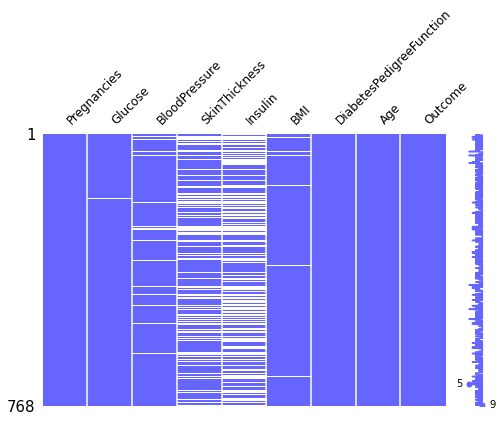

In [27]:
# Graficar DataFrame
msno.matrix(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.show()

Podemos observar que la variable _Glucose_ presenta datos perdidos completamente al azar, por tanto cumple una de nuestras condiciones. La segunda condición es que presente un bajo número de valores faltantes.

In [28]:
# Visualizar valores perdidos en cantidad y porcentaje
print('Cantidad datos faltantes = ' + str(diabetes['Glucose'].isnull().sum()))
print('Los datos faltantes corresponden al ' + str(round(diabetes['Glucose'].isnull().mean() *100, 2))+ '% del total de la data')

Cantidad datos faltantes = 5
Los datos faltantes corresponden al 0.65% del total de la data


Al cumplirse los dos criterios, se procede a eliminar la lista de datos faltante para la variable _Glucose_

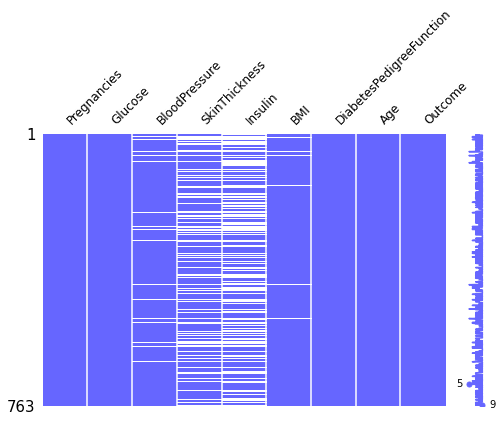

In [29]:
# Eliminar la fila de valores donde la variable Glucose presente valores nulos.
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)

# Graficar DataFrame luego de la eliminación de datos faltantes.
msno.matrix(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.show()

Podemos observar, al igual que la variable _Glucose_, la variable _BMI_ presenta datos perdidos completamente al azar, por tanto cumple una de nuestras condiciones. La segunda condición es que presente un bajo número de valores faltantes.

In [30]:
# Visualizar valores perdidos en cantidad y porcentaje
print('Cantidad datos faltantes = ' + str(diabetes['BMI'].isnull().sum()))
print('Los datos faltantes corresponden al ' + str(round(diabetes['BMI'].isnull().mean() *100, 2))+ '% del total de la data')

Cantidad datos faltantes = 11
Los datos faltantes corresponden al 1.44% del total de la data


Al cumplirse los dos criterios, se procede a eliminar la lista de datos faltante para la variable _BMI_

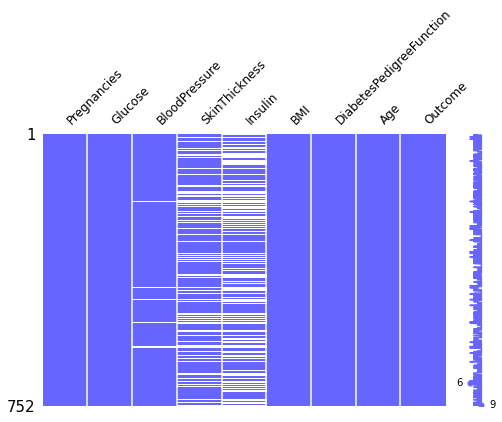

In [31]:
# Eliminar la fila de valores donde la variable BMI presente valores nulos.
diabetes.dropna(subset=['BMI'], how='any', inplace=True)

# Graficar DataFrame luego de la eliminación de datos faltantes.
msno.matrix(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.show()

## Imputación de valores

__SimpleImputer:__

La función SimpleImputer( ) cuenta con las siguientes estrategias (strategy) de imputación a los valores faltantes:

- "mean": El valor faltante se reemplaza por la media. Sólo puede ser usada para datos numéricos.
- "median": El valor faltante se reemplaza por la mediana. Sólo puede ser usada para datos numéricos.
- "most_frequent": El valor faltante se reemplaza por la moda. Puede ser usada tanto para datos de textos y numéricos.
- "constant": El valor faltante se reemplaza por cero. Puede ser usada tanto para datos de textos y numéricos. el valorp or defecto es 0. También, la constante puede ser modificada, por ejemlo, si se desea reemplazar por el valor 5 se debe indicar de la siguiente forma: _SimpleImputer(strategy='constant', fill_value= 5)_.

In [32]:
from sklearn.impute import SimpleImputer 

# Generar copia de DataFrame con el nombre de media
diabetes_media = diabetes.copy(deep=True)

# Crear objeto imputador de media
imputar_media = SimpleImputer(strategy='mean')

# Imputar datos faltantes con la media en el dataframe 
diabetes_media.iloc[:, :] = imputar_media.fit_transform(diabetes_media)

# Visualizar si existen datos nulos
diabetes_media.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
estrategias = {'diabetes_media': 'mean',
              'diabetes_mediana': 'median',
              'diabetes_moda': 'most_frequent',
              'diabetes_constante': 'constant'
              }

for key, value in estrategias.items():
    
    # imprimir método imputación
    print('_'*15 + key + '_'*15)
    
    # generar nuevo DataFrame por estrategia
    key = diabetes.copy(deep=True)
    
    # Crear objeto imputador de media e imputar
    imputar = SimpleImputer(strategy = value)
    
    key.iloc[:, :] = imputar.fit_transform(key)


    # Visualizar si existen datos nulos
    print(key.isna().sum())
    print(key.head(3))
    print() #imprimir salto de línea
    print() #imprimir salto de línea

_______________diabetes_media_______________
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  156.056122  33.6   
1          1.0     85.0           66.0      29.000000  156.056122  26.6   
2          8.0    183.0           64.0      29.172285  156.056122  23.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  


_______________diabetes_mediana_______________
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin               

Observemos que el valor de la fila 3 para la variable _SkinThickness_ antes del proceso de imputaciòn era nulo. Ahora los valores son: media = 29.172285, moda = 29, el más frecuente = 32.

A continuación verificaremos que los valores imputados sean los correctos. Para esto, usaremos las funciones de media, mediana y moda y compararemos con el valor imputado. Observamos que el valor calculado por medio de la función es el mismo al imputado por cada una de las técnicas.

In [34]:
media = round(diabetes['SkinThickness'].mean(),6)
mediana = round(diabetes['SkinThickness'].median(),6)
moda = round(diabetes['SkinThickness'].mode(),6)

print(f'La media para ala variable SkinThickness es de {media}')
print(f'La mediana para ala variable SkinThickness es de {mediana}')
print(f'La moda para a la variable SkinThickness es de {moda}')

La media para ala variable SkinThickness es de 29.172285
La mediana para ala variable SkinThickness es de 29.0
La moda para ala variable SkinThickness es de 0    32.0
dtype: float64


__Imputación de datos faltantes para series temporales__


In [35]:
import os
os.getcwd()

'/Users/luiscuevas/Downloads/ECS-Taller_Analitica_de_datos/entregable/unidad1/Script'

In [36]:
import pandas as pd
# Fijar la ruta donde se encuentra el archivo
ruta = "/Users/luiscuevas/Downloads/ECS-Taller_Analitica_de_datos/Datos/"

# Leer csv indicando el nombre de archivo
air = pd.read_csv(ruta + "air-quality.csv", parse_dates=['Date'], index_col='Date')

# visualizar primeros registros
air.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56
1976-05-06,28.0,NaN,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


- Ozone: Ozono medio en partículas por billón

- Solar.R: Radiación solar.

- Wind: Velocidad promedio del viento en millas por horas.

- Temp: Temperatura máxima diaria en grados Fahrenheit.

In [37]:
# Contar datos nulos
print("Cantidad de datos nulos")
print(air.isna().sum())
print()

# Porcentaje datos nulos
print("Porcentaje de datos nulos")
print(air.isna().mean()*100)

Cantidad de datos nulos
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

Porcentaje de datos nulos
Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


- Método ffill (forward fill): Imputación hacia adelante

Se toma el valor anterior al dato nulo y se imputa dicho valor en los siguientes registros. Por ejemplo, para la columna ozono el valor con fecha __1976-05-04 es de 18.0__, con este valor __se reemplaza el o los valores nulos siguientes__, hasta encontar un valor no faltante. En efecto, el valor faltante con fecha __1976-05-05 se reemplaza por 18.0__.


In [38]:
# Imputar NaNs usando forward fill, es decir, se toma el valor anterior y se reeemplzan por dicho valor los siguientes registros
air.fillna(method='ffill', inplace=True)
air.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,18.0,313.0,14.3,56
1976-05-06,28.0,313.0,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


- Método bfill (back fill): Imputación hacia atrás

Se toma el valor siguiente al dato nulo y se imputa dicho valor en los valores faltantentes que lo preceden. Por ejemplo, para la columna ozono el valor con fecha __1976-05-06 es de 28.0__, con este valor __se reemplaza el o los valores nulos precedentes__, hasta encontar un valor no faltante. En efecto, __el valor faltante con fecha 1976-05-05 se reemplaza por 28.0__


In [39]:
# Leer csv indicando el nombre de archivo (se lee nuevamente debido a que usamos el parámetro inplace= True en la imputación)
air = pd.read_csv(ruta + "air-quality.csv", parse_dates=['Date'], index_col='Date')

# Imputar NaNs usando back fill
air.fillna(method='bfill', inplace=True)
air.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,28.0,299.0,14.3,56
1976-05-06,28.0,299.0,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


- Método lineal (linear): 

Tambien conocido como imputación con valores equidistantes

In [4]:
import pandas as pd 
# Leer csv indicando el nombre de archivo (se lee nuevamente debido a que usamos el parámetro inplace= True en la imputación)
air = pd.read_csv(ruta + "air-quality.csv", parse_dates=['Date'], index_col='Date')

# Imputar NaNs usando interpolación lineal
air.interpolate(method='linear', inplace=True)

# Visualizar imputación
air.head(10)


,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.000000,7.4,67
1976-05-02,36.0,118.000000,8.0,72
1976-05-03,12.0,149.000000,12.6,74
1976-05-04,18.0,313.000000,11.5,62
1976-05-05,23.0,308.333333,14.3,56
1976-05-06,28.0,303.666667,14.9,66
1976-05-07,23.0,299.000000,8.6,65
1976-05-08,19.0,99.000000,13.8,59
1976-05-09,8.0,19.000000,20.1,61


- Método cuadrático (quadratic): 

Tambien conocido como imputación de valores cuadráticos, es decir, sigue una parábola la unión de los puntos presentes para completar los faltantes. Este método busca suavizar la imputación de los datos.

In [41]:
# Leer csv indicando el nombre de archivo (se lee nuevamente debido a que usamos el parámetro inplace= True en la imputación)
air = pd.read_csv(ruta + "air-quality.csv", parse_dates=['Date'], index_col='Date')

# Imputar NaNs usando interpolación cuadrática
air.interpolate(method='quadratic', inplace=True)

# Visualizar imputación
air.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.000000,190.000000,7.4,67
1976-05-02,36.000000,118.000000,8.0,72
1976-05-03,12.000000,149.000000,12.6,74
1976-05-04,18.000000,313.000000,11.5,62
1976-05-05,26.137476,413.213890,14.3,56
1976-05-06,28.000000,412.882252,14.9,66
1976-05-07,23.000000,299.000000,8.6,65
1976-05-08,19.000000,99.000000,13.8,59
1976-05-09,8.000000,19.000000,20.1,61


- Método valores cercanos (nearest): 

Imputa con los valores faltantes con los valores cercanos observados. se considera una combinación de los métodos forward fill y backward fill.

In [42]:
# Leer csv indicando el nombre de archivo (se lee nuevamente debido a que usamos el parámetro inplace= True en la imputación)
air = pd.read_csv(ruta + "air-quality.csv", parse_dates=['Date'], index_col='Date')

# Imputar NaNs usando interpolación nearest
air.interpolate(method='nearest', inplace=True)

# Visualizar imputación
air.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,18.0,313.0,14.3,56
1976-05-06,28.0,299.0,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


- Graficos de comparación

en Primer lugar realizaremos un gráfíco para uno de los métodos estudiados a fin de conocer la forma que toma la imputación.

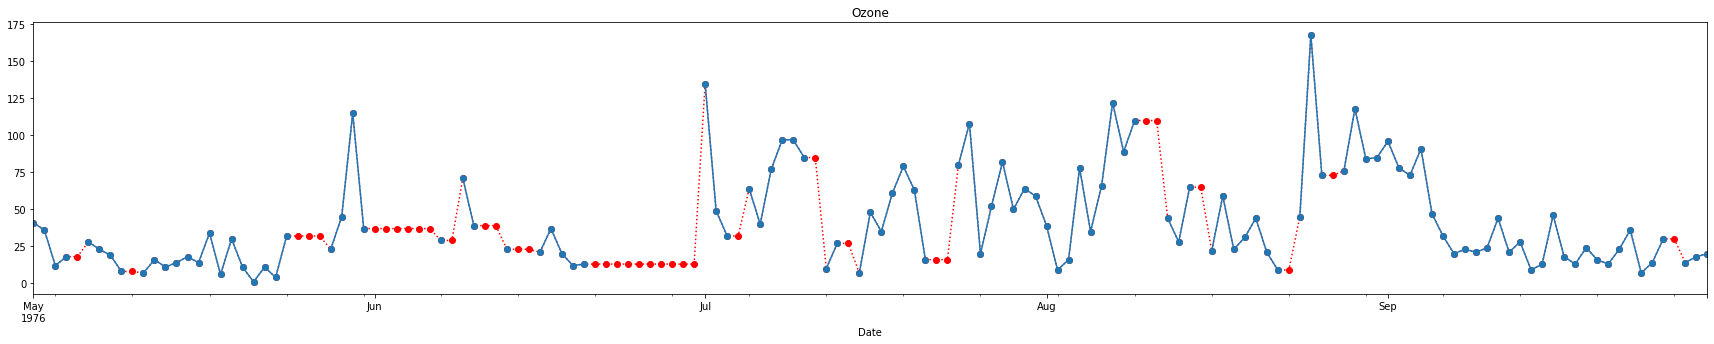

In [43]:
import matplotlib.pyplot as plt
# Leer csv indicando el nombre de archivo (se lee nuevamente debido a que usamos el parámetro inplace= True en la imputación)
air = pd.read_csv(ruta + "air-quality.csv", parse_dates=['Date'], index_col='Date')

# Impute airquality DataFrame with ffill method
ffill_imputed = air.fillna(method='ffill')

# Plot the imputed DataFrame ffill_imp in red dotted style 
ffill_imputed['Ozone'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
air['Ozone'].plot(title='Ozone', marker='o')

plt.show()

In [44]:
# Leer csv indicando el nombre de archivo (se lee nuevamente debido a que usamos el parámetro inplace= True en la imputación)
air = pd.read_csv(ruta + "air-quality.csv", parse_dates=['Date'], index_col='Date')

A continuación se generaliza la gráfica para todos los métodos de imputación. Utilizaremos la columna _Ozone_ para visualizar los resultados de la imputación.

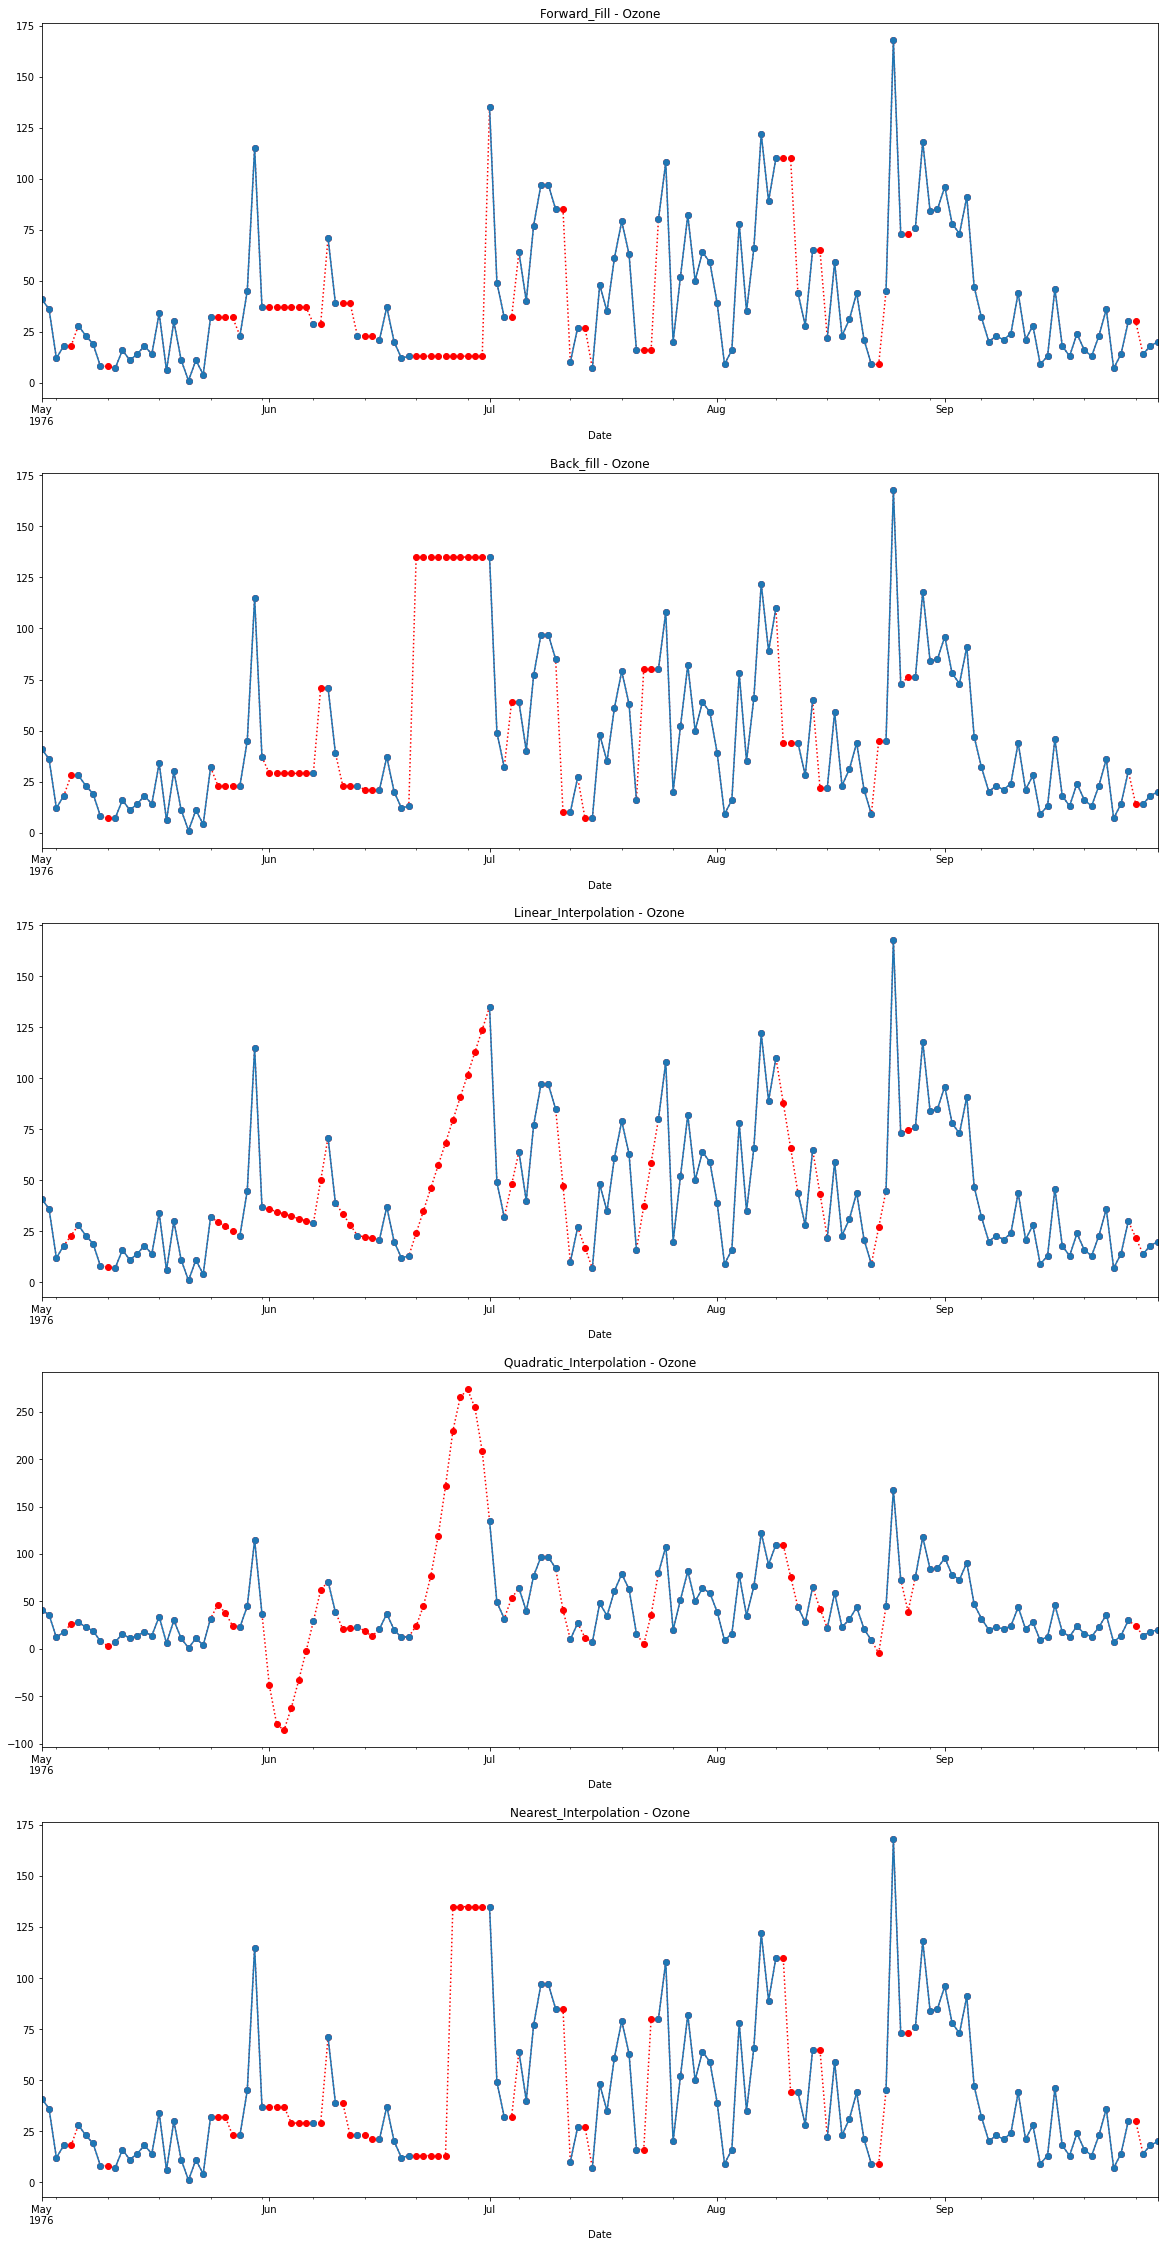

In [45]:
# Crear diccionarios métodos de imputación
metodos = {'Forward_Fill':'ffill',
          'Back_fill': 'bfill',}

metodos2 = {'Linear_Interpolation': 'linear', 
           'Quadratic_Interpolation': 'quadratic', 
           'Nearest_Interpolation': 'nearest'}

# Crear diccionario resultado de imputación
interpolaciones = {key:air.fillna(method=value) for key, value in metodos.items()}

# Actualizar diccionario resultado de imputación (interpolación)
interpolaciones.update({key:air.interpolate(method=value) for key, value in metodos2.items()})

# Configurar número de filas a 5 y número de columnas a 1
fig, axes = plt.subplots(5, 1, figsize=(20, 40))

# Loop for sobre axes e interpolaciones
for ax, key in zip(axes, interpolaciones):
  # Select and also set the title for a DataFrame
  interpolaciones[key]['Ozone'].plot(color='red', marker='o', linestyle='dotted', ax=ax)
  air['Ozone'].plot(title=key + ' - Ozone', marker='o', ax=ax)
  
plt.show()

Accederemos a uno de los elementos creados en nuestro diccionario de interpolación a fin de guardar dicho set de datos en nuestro directorio de trabajo para futuros usos.

In [46]:
# Guardar csv interpolado
interpolaciones['Linear_Interpolation'].to_csv(ruta+'air_linear_interpolation.csv')

## Métodos avanzados de imputación

- Imputación de datos por medio de KNN (K-Vecinos Cercanos)  __librería sklearn.impute módulo KNNImputer__

En el caso de los K-Vecinos más cercanos por ejemplo, el objetivo fundamental es encontrar vecinos cercanos al valor faltante por por medio de métricas de distancias. La más utilizada es la euclidiana.

Este método es más preciso que la imputación simple por media, mediana, moda o valor constante. Sin embargo, estos modelos pueden ser costosos computacionalmente hablando, pueden generar multicolinealidad y son sensibles a valores atípicos.

In [47]:
import numpy as np
import pandas as pd
data = pd.DataFrame({'id': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                     'area': [1, 2, 3, 1, 2, 3, 1, 2, 3],
                     'edad': [32, 30, np.nan, 23, 27, 44, 67, 23, np.nan],
                     'monto': [102, 121, 343, np.nan, 121, np.nan, 155, 149, 221]})

In [48]:
# Importar libreria
from sklearn.impute import KNNImputer

# Generar copia del DataFrame diabetes
data_imputer = data.copy(deep = True)

# Iniciar KNNImputer
imputacion_knn = KNNImputer(n_neighbors=1)

# Imputar usando fit_tranform en data_imputer
data_imputer.iloc[:, :] = imputacion_knn.fit_transform(data_imputer)

data_imputer


,id,area,edad,monto
0,1.0,1.0,32.0,102.0
1,2.0,2.0,30.0,121.0
2,3.0,3.0,23.0,343.0
3,4.0,1.0,23.0,343.0
4,5.0,2.0,27.0,121.0
5,6.0,3.0,44.0,343.0
6,7.0,1.0,67.0,155.0
7,8.0,2.0,23.0,149.0
8,9.0,3.0,44.0,221.0


A continuación realizaremos el calculo manual de este tipo de imputación a fin de ver si  el algoritmo realiza de manera correcta la imputación.

In [49]:
data

,id,area,edad,monto
0,1,1,32.0,102.0
1,2,2,30.0,121.0
2,3,3,NaN,343.0
3,4,1,23.0,NaN
4,5,2,27.0,121.0
5,6,3,44.0,NaN
6,7,1,67.0,155.0
7,8,2,23.0,149.0
8,9,3,NaN,221.0


La formula de calculo es la siguiente.

$\text{Distancia Euclidiana nan = } \sqrt{peso * ((x_2 - x_1)^2)+(y_2 - y_1)^2)+ ...+ (z_2 -z_1)^2} \\
\text{donde peso} = \dfrac{\text{num columnas predictoras}}{\text{num columnas predictoras}- \text{columnas nan}}$

nota: las columnas predictoras son aquellas que buscan predecir el valor nulo. 

En el ejemplo que se desarrollará, se busca predecir el valor faltante tanto de la fila 3 y 9 de la columna edad. En este caso:



|id	  |area	|edad |monto|
|-----|-----|-----|-----|
|3    |3	|NaN  |343.0|
|9    |3	|NaN  |221.0|




- columnas predictoras= 3, es decir: _id_, _area_, _monto_.
- columnas predictoras- columnas nan = número de columnas válidas de la fila que se usa para predecir. En el caso de las fila 4 son 2, , es decir: _id_, _area_. _Monto_ es NaN.


In [50]:
import math
# Encontrar valor ausente para fila 3 de forma manual.
# sqrt(peso * ((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2 )
print(str(int(data.iloc[0,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[0,0]) -3)**2 + ( int(data.iloc[0,1]) -3)**2 + (int(data.iloc[0,3]) - 343)**2)) ))
print(str(int(data.iloc[1,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[1,0]) -3)**2 + ( int(data.iloc[1,1]) -3)**2 + (int(data.iloc[1,3]) - 343)**2)) ))
print(str(int(data.iloc[3,2]))+ ' = ' + str(math.sqrt(3/2 * (( int(data.iloc[3,0]) -3)**2 + ( int(data.iloc[3,1]) -3)**2))))
print(str(int(data.iloc[4,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[4,0]) -3)**2 + ( int(data.iloc[4,1]) -3)**2 + (int(data.iloc[4,3]) - 343)**2)) ))
print(str(int(data.iloc[5,2]))+ ' = ' + str(math.sqrt(3/2 * (( int(data.iloc[5,0]) -3)**2 + ( int(data.iloc[5,1]) -3)**2))))
print(str(int(data.iloc[6,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[6,0]) -3)**2 + ( int(data.iloc[6,1]) -3)**2 + (int(data.iloc[6,3]) - 343)**2)) ))
print(str(int(data.iloc[7,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[7,0]) -3)**2 + ( int(data.iloc[7,1]) -3)**2 + (int(data.iloc[7,3]) - 343)**2)) ))

32 = 241.01659693888303
30 = 222.00450445880597
23 = 2.7386127875258306
27 = 222.01126097565412
44 = 3.6742346141747673
67 = 188.05318396666408
23 = 194.06699874012583


Para la fila 3, el valor a imputar es __23__ dado que tiene la menor distancia.

A continuación, se genera una función y se obtienen las distancias euclideanas nan para las filas 3 y 9 para predecir el valor de la columna __age__

In [51]:
# sqrt(peso * ((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2 )

def fn_knn_manual(x1,y1,z1):
    print(str(int(data.iloc[0,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[0,0]) - x1 )**2 + ( int(data.iloc[0,1]) - y1 )**2 + (int(data.iloc[0,3]) - z1 )**2)) ))
    print(str(int(data.iloc[1,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[1,0]) - x1 )**2 + ( int(data.iloc[1,1]) - y1 )**2 + (int(data.iloc[1,3]) - z1 )**2)) ))
    print(str(int(data.iloc[3,2]))+ ' = ' + str(math.sqrt(3/2 * (( int(data.iloc[3,0]) - x1 )**2 + ( int(data.iloc[3,1]) - y1 )**2))))
    print(str(int(data.iloc[4,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[4,0]) - x1 )**2 + ( int(data.iloc[4,1]) - y1 )**2 + (int(data.iloc[4,3]) - z1 )**2)) ))
    print(str(int(data.iloc[5,2]))+ ' = ' + str(math.sqrt(3/2 * (( int(data.iloc[5,0]) - x1 )**2 + ( int(data.iloc[5,1]) - y1 )**2))))
    print(str(int(data.iloc[6,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[6,0]) - x1 )**2 + ( int(data.iloc[6,1]) - y1 )**2 + (int(data.iloc[6,3]) - z1 )**2)) ))
    print(str(int(data.iloc[7,2]))+ ' = ' + str(math.sqrt(3/3 * (( int(data.iloc[7,0]) - x1 )**2 + ( int(data.iloc[7,1]) - y1 )**2 + (int(data.iloc[7,3]) - z1 )**2)) ))

In [52]:
# Encontrar valor ausente para fila 2
fn_knn_manual(x1 = 3, y1 = 3, z1 = 343.0)

32 = 241.01659693888303
30 = 222.00450445880597
23 = 2.7386127875258306
27 = 222.01126097565412
44 = 3.6742346141747673
67 = 188.05318396666408
23 = 194.06699874012583


In [53]:
print('valor ausente para fila 2:')
print()
print('n_neighbors = 1 el valor a imputar es ' + str((23)/1))
print('n_neighbors = 2 el valor a imputar es ' + str((23+44)/2))
print('n_neighbors = 3 el valor a imputar es ' + str((23+44+67)/3))
print('n_neighbors = 4 el valor a imputar es ' + str((23+44+67+23)/4))
print('n_neighbors = 5 el valor a imputar es ' + str((23+44+67+23+30)/5))

valor ausente para fila 2:

n_neighbors = 1 el valor a imputar es 23.0
n_neighbors = 2 el valor a imputar es 33.5
n_neighbors = 3 el valor a imputar es 44.666666666666664
n_neighbors = 4 el valor a imputar es 39.25
n_neighbors = 5 el valor a imputar es 37.4


In [54]:
# Encontrar valor ausente para fila 8
fn_knn_manual(x1 = 9, y1 = 3, z1 = 221.0)

32 = 119.28537211242626
30 = 100.2496882788171
23 = 6.59545297913646
27 = 100.08496390567366
44 = 3.6742346141747673
67 = 66.06057825965497
23 = 72.01388754955533


In [55]:
print('valor ausente para fila 8:')
print()
print('n_neighbors = 1 el valor a imputar es ' + str((44)/1))
print('n_neighbors = 2 el valor a imputar es ' + str((44+23)/2))
print('n_neighbors = 3 el valor a imputar es ' + str((44+23+67)/3))
print('n_neighbors = 4 el valor a imputar es ' + str((44+23+67+23)/4))
print('n_neighbors = 5 el valor a imputar es ' + str((44+23+67+23+27)/5))

valor ausente para fila 8:

n_neighbors = 1 el valor a imputar es 44.0
n_neighbors = 2 el valor a imputar es 33.5
n_neighbors = 3 el valor a imputar es 44.666666666666664
n_neighbors = 4 el valor a imputar es 39.25
n_neighbors = 5 el valor a imputar es 36.8


In [56]:
# Importar libreria
from sklearn.impute import KNNImputer

# Copy diabetes to diabetes_knn_imputed
data_imputer = data.copy(deep = True)

# Initialize KNN
imputacion_knn = KNNImputer(n_neighbors=1)

# Impute using fit_tranform on diabetes_knn_imputed
data_imputer.iloc[:, :] = imputacion_knn.fit_transform(data_imputer)

data_imputer

,id,area,edad,monto
0,1.0,1.0,32.0,102.0
1,2.0,2.0,30.0,121.0
2,3.0,3.0,23.0,343.0
3,4.0,1.0,23.0,343.0
4,5.0,2.0,27.0,121.0
5,6.0,3.0,44.0,343.0
6,7.0,1.0,67.0,155.0
7,8.0,2.0,23.0,149.0
8,9.0,3.0,44.0,221.0


Comprobemos lo indicado por medio del método manual

In [57]:
# n_neighbors cantidad de vecinos. Si se escoge un valor mayor de uno se obtiene el promedio delos vecinos cercanos detectados.
for i in range(1,6):
    knn = KNNImputer(n_neighbors=i, weights='uniform', metric='nan_euclidean')

    # se aplica la imputación por knn entrenada a la data.
    data_imputer.iloc[:, :]  = knn.fit_transform(data_imputer)


    # Modificamos el nombre de las columnas por el nombre original 
    #neighbors.columns = columnas
    print('neighbors = ' + str(i))
    print(data_imputer)
    print('_'*45) # imprimir linea divisora de df
    print() #imprimir salto de línea

neighbors = 1
    id  area  edad  monto
0  1.0   1.0  32.0  102.0
1  2.0   2.0  30.0  121.0
2  3.0   3.0  23.0  343.0
3  4.0   1.0  23.0  343.0
4  5.0   2.0  27.0  121.0
5  6.0   3.0  44.0  343.0
6  7.0   1.0  67.0  155.0
7  8.0   2.0  23.0  149.0
8  9.0   3.0  44.0  221.0
_____________________________________________

neighbors = 2
    id  area  edad  monto
0  1.0   1.0  32.0  102.0
1  2.0   2.0  30.0  121.0
2  3.0   3.0  23.0  343.0
3  4.0   1.0  23.0  343.0
4  5.0   2.0  27.0  121.0
5  6.0   3.0  44.0  343.0
6  7.0   1.0  67.0  155.0
7  8.0   2.0  23.0  149.0
8  9.0   3.0  44.0  221.0
_____________________________________________

neighbors = 3
    id  area  edad  monto
0  1.0   1.0  32.0  102.0
1  2.0   2.0  30.0  121.0
2  3.0   3.0  23.0  343.0
3  4.0   1.0  23.0  343.0
4  5.0   2.0  27.0  121.0
5  6.0   3.0  44.0  343.0
6  7.0   1.0  67.0  155.0
7  8.0   2.0  23.0  149.0
8  9.0   3.0  44.0  221.0
_____________________________________________

neighbors = 4
    id  area  edad  mon

__librería fancyimpute__

- Imputación de datos por medio de K-Vecinos Cercanos (K-Nearest Neighbor)

A diferencia del paquete anterior, funcyimpute asume que cada característica ha sido centrada y reescalada para tener media cero y varianza 1.Dado esto, puede presentar diferencias con el paquete anterior para k-Neighbor > 1.

In [58]:
# Import KNN from fancyimpute
from fancyimpute import KNN

# Copy diabetes to diabetes_knn_imputed
diabetes_imputacion_knn = diabetes.copy(deep = True)

# Initialize KNN
imputacion_knn = KNN(k=5)

# Impute using fit_tranform on diabetes_knn_imputed
diabetes_imputacion_knn.iloc[:, :] = imputacion_knn.fit_transform(diabetes_imputacion_knn)

diabetes_imputacion_knn

Imputing row 1/752 with 1 missing, elapsed time: 0.062
Imputing row 101/752 with 0 missing, elapsed time: 0.064
Imputing row 201/752 with 2 missing, elapsed time: 0.065
Imputing row 301/752 with 0 missing, elapsed time: 0.066
Imputing row 401/752 with 1 missing, elapsed time: 0.068
Imputing row 501/752 with 2 missing, elapsed time: 0.069
Imputing row 601/752 with 0 missing, elapsed time: 0.070
Imputing row 701/752 with 0 missing, elapsed time: 0.072


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,162.743255,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,62.914770,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,26.464588,180.726394,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,169.595752,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,32.886413,130.228539,30.1,0.349,47.0,1.0


- Imputaciones múltiples por ecuaciones encadenadas (MICE)

In [59]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep= True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice_imputed)
diabetes_mice_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,218.666626,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.738265,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.532888,268.732425,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,159.038930,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,27.896077,173.401535,30.1,0.349,47.0,1.0


- Valores categóricos: 

Exiten dos técnicas para transformar los datos: One-Hot Encoder y Ordinal Encoder

- One-Hot Encoder: 

Crear una columna para cada valor distinto que exista en la variable que estamos codificando y coloca el valor 1 a la columna que pertenece el registro y las demás se coloca el vaor 0.

|Pais|Pais_Chile|Pais_Argentina|Pais_Perú|Pais_Bolivia|
|--|--|--|--|--|
|Chile|1|0|0|0|
|Argentina|0|1|0|0|
|Perú|0|0|1|0|
|Bolivia|0|0|0|1|

- Ordinal Encoder

Se crea una columna que va tomando distintos valores por categoría de la variable que estamos codificando. 

|Pais|Vaue|
|--|--|
|Chile|0|
|Argentina|1|
|Perú|2|
|Bolivia|3|

In [60]:
#data descarada del sitio https://archive.ics.uci.edu/ml/datasets/Restaurant%2B%26%2Bconsumer%2Bdata
#además, se han seleccionado algunas columnas para el ejercicio

users = pd.read_csv(ruta + 'userprofile.csv', sep = ';', na_values= '?')
users.head(10)

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,False,abstemious,informal,family,independent,student,medium
1,False,abstemious,informal,family,independent,student,low
2,False,social drinker,formal,family,independent,student,low
3,False,abstemious,informal,family,independent,professional,medium
4,False,abstemious,no preference,family,independent,student,medium
5,True,social drinker,no preference,friends,independent,student,medium
6,False,casual drinker,informal,solitary,independent,student,low
7,False,social drinker,formal,solitary,independent,student,low
8,False,abstemious,formal,family,kids,student,medium
9,False,social drinker,no preference,friends,kids,student,medium


In [61]:
#Importar librería
from sklearn.preprocessing import OrdinalEncoder

# Crear Objeto Encoder Nominal
ambience_ord_enc = OrdinalEncoder()

# Seleccionar los valores no nulos de la columna ambiece del DataFrame users.
ambience = users['ambience']
ambience_not_null = ambience[ambience.notnull()]

# Cambiar forma  a data ambience_not_null a forma (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Aplicar Ordinal Encode a reshaped_vals
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)

# Asignar valores codificados a valores no nulos de la variable ambience en el DataFrame users
users.loc[ambience.notnull(), 'ambience'] = np.squeeze(encoded_vals)

In [62]:
# Visualizar encoder
users.head(10)

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,False,abstemious,informal,0.0,independent,student,medium
1,False,abstemious,informal,0.0,independent,student,low
2,False,social drinker,formal,0.0,independent,student,low
3,False,abstemious,informal,0.0,independent,professional,medium
4,False,abstemious,no preference,0.0,independent,student,medium
5,True,social drinker,no preference,1.0,independent,student,medium
6,False,casual drinker,informal,2.0,independent,student,low
7,False,social drinker,formal,2.0,independent,student,low
8,False,abstemious,formal,0.0,kids,student,medium
9,False,social drinker,no preference,1.0,kids,student,medium


A continuación se procede a generalizar lo realizado anteriormente por medio de un loop for

In [63]:
# Crear diccionario vacio "ordinal_enc_dict"
ordinal_enc_dict = {}

for col_name in users:
    # Crear Ordinal encoder para col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]
    
    # Seleccionar valores non-null de col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Almacenar los valores a los valores de la columna de DataFrame users
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [64]:
users.head(10)

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,0.0,0.0,2.0,0.0,1.0,1.0,2.0
1,0.0,0.0,2.0,0.0,1.0,1.0,1.0
2,0.0,2.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,2.0,0.0,1.0,0.0,2.0
4,0.0,0.0,3.0,0.0,1.0,1.0,2.0
5,1.0,2.0,3.0,1.0,1.0,1.0,2.0
6,0.0,1.0,2.0,2.0,1.0,1.0,1.0
7,0.0,2.0,1.0,2.0,1.0,1.0,1.0
8,0.0,0.0,1.0,0.0,2.0,1.0,2.0
9,0.0,2.0,3.0,1.0,2.0,1.0,2.0


Una vez codificada la data, se procede a realizar la imputación por medio de KNN

In [65]:
# Crear imputador KNN
KNN_imputer = KNN()

# Imputar y redondear los valores en el DataFrame users
users.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Aplicar loop for a las columnas del DataFrame users
for col_name in users:
    
    # Transformar la data
    reshaped = users[col_name].values.reshape(-1, 1)
    
    # Realizar transformación inversa de las columnas codificadas ordinalmente
    users[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Imputing row 1/138 with 0 missing, elapsed time: 0.012
Imputing row 101/138 with 0 missing, elapsed time: 0.014


In [66]:
# Revisar presencia de datos faltantes.
users.isna().sum()

smoker              0
drink_level         0
dress_preference    0
ambience            0
hijos               0
activity            0
budget              0
dtype: int64